In [44]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [45]:
filename = 'data_COVID19.csv'
df = pd.read_csv(filename)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13211 entries, 0 to 13210
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  13211 non-null  object 
 1   day                      13211 non-null  int64  
 2   month                    13211 non-null  int64  
 3   year                     13211 non-null  int64  
 4   cases                    13211 non-null  int64  
 5   deaths                   13211 non-null  int64  
 6   countriesAndTerritories  13211 non-null  object 
 7   geoId                    13168 non-null  object 
 8   countryterritoryCode     13067 non-null  object 
 9   popData2018              13095 non-null  float64
 10  continentExp             13211 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 1.1+ MB
None


In [46]:
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,26/04/2020,26,4,2020,112,4,Afghanistan,AF,AFG,37172386.0,Asia
1,25/04/2020,25,4,2020,70,1,Afghanistan,AF,AFG,37172386.0,Asia
2,24/04/2020,24,4,2020,105,2,Afghanistan,AF,AFG,37172386.0,Asia
3,23/04/2020,23,4,2020,84,4,Afghanistan,AF,AFG,37172386.0,Asia
4,22/04/2020,22,4,2020,61,1,Afghanistan,AF,AFG,37172386.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
13206,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
13207,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0,Africa
13208,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
13209,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


In [47]:
df = df.loc[df['countriesAndTerritories'] == 'Italy']

In [48]:
df = df.iloc[::-1]

In [49]:
df = df[['dateRep','cases']]

In [50]:
df.reset_index(drop=True, inplace=True)

In [51]:
df['dateRep'] = pd.to_datetime(df['dateRep'])

In [52]:
df.set_axis(df['dateRep'], inplace=True)

In [53]:
df

,dateRep,cases
dateRep,,
2019-12-31,2019-12-31,0
2020-01-01,2020-01-01,0
2020-02-01,2020-02-01,0
2020-03-01,2020-03-01,0
2020-04-01,2020-04-01,0
...,...,...
2020-04-22,2020-04-22,2729
2020-04-23,2020-04-23,3370
2020-04-24,2020-04-24,2646


In [54]:
df['cases'] = df['cases'].cumsum()
cases_data = df['cases'].values

In [55]:
cases_data = cases_data.reshape((-1,1))

In [56]:
cases_data

array([[     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [    17],
       [    79],
       [   132],
       [   229],
       [   322],
       [   400

In [57]:
split_percent = 0.80

In [58]:
split = int(split_percent*len(cases_data))


In [59]:
cases_data_train = cases_data[:]

In [60]:
cases_data_test = cases_data[:]

In [61]:
date_train = df['dateRep'][:]


In [62]:
date_test = df[['dateRep']][split:]

In [63]:
print(len(cases_data_test))
print(len(cases_data_train))

118
118


In [84]:
look_back = 10


In [85]:
train_generator = TimeseriesGenerator(cases_data_train, cases_data_train, length=look_back, batch_size=5)     


In [86]:
test_generator = TimeseriesGenerator(cases_data_test, cases_data_test, length=look_back, batch_size=1)


In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop 
from tensorflow.keras.losses import mae
model = Sequential()
model.add(LSTM(4, activation='relu', input_shape=(look_back,1)))
model.add(Dense(4,activation='linear'))
model.add(Dense(4,activation='linear'))
#model.add(Dense(4,activation='linear'))
model.add(Dense(1, activation='linear'))
opt = RMSprop(learning_rate=0.0005)
model.compile(optimizer=opt, loss=mae)

num_epochs = 1000

In [88]:
model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/1000
22/22 [==============================] - 0s 3ms/step - loss: 50765.1094
Epoch 2/1000
22/22 [==============================] - 0s 3ms/step - loss: 50421.3086
Epoch 3/1000
22/22 [==============================] - 0s 2ms/step - loss: 50122.4414
Epoch 4/1000
22/22 [==============================] - 0s 3ms/step - loss: 49812.2148
Epoch 5/1000
22/22 [==============================] - 0s 3ms/step - loss: 49487.5000
Epoch 6/1000
22/22 [==============================] - 0s 2ms/step - loss: 49147.2891
Epoch 7/1000
22/22 [==============================] - 0s 2ms/step - loss: 48830.8984
Epoch 8/1000
22/22 [==============================] - 0s 2ms/step - loss: 48457.3711
Epoch 9/1000
22/22 [==============================] - 0s 3ms/step - loss: 48079.5117
Epoch 10/1000
22/22 [==============================] - 0s 2ms/step - loss: 47687.3906
Epoch 11/1000
22/22 [==============================] - 0s 2ms/step - loss: 47287.4961
Epoch 12/1000
22/22 [==============================] - 0s 2ms/s

22/22 [==============================] - 0s 2ms/step - loss: 3379.7720
Epoch 98/1000
22/22 [==============================] - 0s 2ms/step - loss: 4105.7251
Epoch 99/1000
22/22 [==============================] - 0s 2ms/step - loss: 3920.0217
Epoch 100/1000
22/22 [==============================] - 0s 2ms/step - loss: 3911.9158
Epoch 101/1000
22/22 [==============================] - 0s 2ms/step - loss: 4162.0762
Epoch 102/1000
22/22 [==============================] - 0s 2ms/step - loss: 5254.4517
Epoch 103/1000
22/22 [==============================] - 0s 2ms/step - loss: 4290.4712
Epoch 104/1000
22/22 [==============================] - 0s 2ms/step - loss: 2838.5896
Epoch 105/1000
22/22 [==============================] - 0s 2ms/step - loss: 2166.5564
Epoch 106/1000
22/22 [==============================] - 0s 2ms/step - loss: 2128.4668
Epoch 107/1000
22/22 [==============================] - 0s 2ms/step - loss: 2096.7769
Epoch 108/1000
22/22 [==============================] - 0s 2ms/step - l

22/22 [==============================] - 0s 2ms/step - loss: 7147.6611
Epoch 193/1000
22/22 [==============================] - 0s 2ms/step - loss: 6520.3154
Epoch 194/1000
22/22 [==============================] - 0s 2ms/step - loss: 5030.0620
Epoch 195/1000
22/22 [==============================] - 0s 2ms/step - loss: 5117.8130
Epoch 196/1000
22/22 [==============================] - 0s 3ms/step - loss: 6240.4419
Epoch 197/1000
22/22 [==============================] - 0s 3ms/step - loss: 4337.6934
Epoch 198/1000
22/22 [==============================] - 0s 2ms/step - loss: 3989.1421
Epoch 199/1000
22/22 [==============================] - 0s 2ms/step - loss: 4000.1946
Epoch 200/1000
22/22 [==============================] - 0s 2ms/step - loss: 3918.3623
Epoch 201/1000
22/22 [==============================] - 0s 2ms/step - loss: 3623.9482
Epoch 202/1000
22/22 [==============================] - 0s 2ms/step - loss: 4003.7322
Epoch 203/1000
22/22 [==============================] - 0s 2ms/step -

22/22 [==============================] - 0s 3ms/step - loss: 2744.3994
Epoch 287/1000
22/22 [==============================] - 0s 2ms/step - loss: 2266.6946
Epoch 288/1000
22/22 [==============================] - 0s 2ms/step - loss: 2796.3171
Epoch 289/1000
22/22 [==============================] - 0s 3ms/step - loss: 2237.9626
Epoch 290/1000
22/22 [==============================] - 0s 3ms/step - loss: 3850.3774
Epoch 291/1000
22/22 [==============================] - 0s 3ms/step - loss: 3993.2810
Epoch 292/1000
22/22 [==============================] - 0s 2ms/step - loss: 2955.1074
Epoch 293/1000
22/22 [==============================] - 0s 2ms/step - loss: 2071.3494
Epoch 294/1000
22/22 [==============================] - 0s 3ms/step - loss: 2013.9613
Epoch 295/1000
22/22 [==============================] - 0s 2ms/step - loss: 1866.6378
Epoch 296/1000
22/22 [==============================] - 0s 3ms/step - loss: 2316.2549
Epoch 297/1000
22/22 [==============================] - 0s 2ms/step -

22/22 [==============================] - 0s 2ms/step - loss: 7015.6265
Epoch 382/1000
22/22 [==============================] - 0s 3ms/step - loss: 6174.8926
Epoch 383/1000
22/22 [==============================] - 0s 3ms/step - loss: 5966.4927
Epoch 384/1000
22/22 [==============================] - 0s 2ms/step - loss: 6929.01760s - loss: 6929.01
Epoch 385/1000
22/22 [==============================] - 0s 2ms/step - loss: 6740.7544
Epoch 386/1000
22/22 [==============================] - 0s 2ms/step - loss: 6824.0640
Epoch 387/1000
22/22 [==============================] - 0s 2ms/step - loss: 6739.2607
Epoch 388/1000
22/22 [==============================] - 0s 2ms/step - loss: 6256.4771
Epoch 389/1000
22/22 [==============================] - 0s 2ms/step - loss: 6608.0610
Epoch 390/1000
22/22 [==============================] - 0s 2ms/step - loss: 6576.2324
Epoch 391/1000
22/22 [==============================] - 0s 2ms/step - loss: 6478.0464
Epoch 392/1000
22/22 [=============================

22/22 [==============================] - 0s 2ms/step - loss: 6040.5708
Epoch 477/1000
22/22 [==============================] - 0s 2ms/step - loss: 5915.5386
Epoch 478/1000
22/22 [==============================] - 0s 2ms/step - loss: 5813.9873
Epoch 479/1000
22/22 [==============================] - 0s 2ms/step - loss: 6129.5752
Epoch 480/1000
22/22 [==============================] - 0s 2ms/step - loss: 5531.4277
Epoch 481/1000
22/22 [==============================] - 0s 2ms/step - loss: 5541.0449
Epoch 482/1000
22/22 [==============================] - 0s 2ms/step - loss: 4985.1382
Epoch 483/1000
22/22 [==============================] - 0s 2ms/step - loss: 6350.1870
Epoch 484/1000
22/22 [==============================] - 0s 2ms/step - loss: 5972.9473
Epoch 485/1000
22/22 [==============================] - 0s 2ms/step - loss: 5956.3125
Epoch 486/1000
22/22 [==============================] - 0s 2ms/step - loss: 5423.6099
Epoch 487/1000
22/22 [==============================] - 0s 2ms/step -

22/22 [==============================] - 0s 3ms/step - loss: 6987.3452
Epoch 572/1000
22/22 [==============================] - 0s 3ms/step - loss: 10688.2559
Epoch 573/1000
22/22 [==============================] - 0s 3ms/step - loss: 9962.3037
Epoch 574/1000
22/22 [==============================] - 0s 3ms/step - loss: 9442.3428
Epoch 575/1000
22/22 [==============================] - 0s 2ms/step - loss: 9655.9941
Epoch 576/1000
22/22 [==============================] - 0s 2ms/step - loss: 5929.3145
Epoch 577/1000
22/22 [==============================] - 0s 2ms/step - loss: 6265.7827
Epoch 578/1000
22/22 [==============================] - 0s 2ms/step - loss: 6471.4927
Epoch 579/1000
22/22 [==============================] - 0s 2ms/step - loss: 9210.3887
Epoch 580/1000
22/22 [==============================] - 0s 2ms/step - loss: 6549.3105
Epoch 581/1000
22/22 [==============================] - 0s 2ms/step - loss: 7228.4033
Epoch 582/1000
22/22 [==============================] - 0s 3ms/step 

22/22 [==============================] - 0s 2ms/step - loss: 4706.1792
Epoch 667/1000
22/22 [==============================] - 0s 2ms/step - loss: 5248.7817
Epoch 668/1000
22/22 [==============================] - 0s 2ms/step - loss: 4586.6011
Epoch 669/1000
22/22 [==============================] - 0s 2ms/step - loss: 5421.5176
Epoch 670/1000
22/22 [==============================] - 0s 2ms/step - loss: 5286.5073
Epoch 671/1000
22/22 [==============================] - 0s 2ms/step - loss: 5306.1128
Epoch 672/1000
22/22 [==============================] - 0s 2ms/step - loss: 5037.7949
Epoch 673/1000
22/22 [==============================] - 0s 2ms/step - loss: 5531.2568
Epoch 674/1000
22/22 [==============================] - 0s 3ms/step - loss: 5610.7939
Epoch 675/1000
22/22 [==============================] - 0s 2ms/step - loss: 5395.2393
Epoch 676/1000
22/22 [==============================] - 0s 2ms/step - loss: 5741.2427
Epoch 677/1000
22/22 [==============================] - 0s 2ms/step -

22/22 [==============================] - 0s 2ms/step - loss: 3280.7803
Epoch 762/1000
22/22 [==============================] - 0s 2ms/step - loss: 3408.1064
Epoch 763/1000
22/22 [==============================] - 0s 2ms/step - loss: 3532.5178
Epoch 764/1000
22/22 [==============================] - 0s 2ms/step - loss: 2988.8228
Epoch 765/1000
22/22 [==============================] - 0s 2ms/step - loss: 2977.9150
Epoch 766/1000
22/22 [==============================] - 0s 2ms/step - loss: 2961.3049
Epoch 767/1000
22/22 [==============================] - 0s 2ms/step - loss: 3326.9626
Epoch 768/1000
22/22 [==============================] - 0s 2ms/step - loss: 3517.7556
Epoch 769/1000
22/22 [==============================] - 0s 3ms/step - loss: 3039.8735
Epoch 770/1000
22/22 [==============================] - 0s 2ms/step - loss: 3042.9639
Epoch 771/1000
22/22 [==============================] - 0s 2ms/step - loss: 3287.3174
Epoch 772/1000
22/22 [==============================] - 0s 2ms/step -

22/22 [==============================] - 0s 2ms/step - loss: 3400.4744
Epoch 857/1000
22/22 [==============================] - 0s 2ms/step - loss: 2658.6831
Epoch 858/1000
22/22 [==============================] - 0s 2ms/step - loss: 4409.7285
Epoch 859/1000
22/22 [==============================] - 0s 2ms/step - loss: 4167.9736
Epoch 860/1000
22/22 [==============================] - 0s 2ms/step - loss: 4181.4409
Epoch 861/1000
22/22 [==============================] - 0s 2ms/step - loss: 5239.1294
Epoch 862/1000
22/22 [==============================] - 0s 2ms/step - loss: 5186.1157
Epoch 863/1000
22/22 [==============================] - 0s 2ms/step - loss: 7514.0688
Epoch 864/1000
22/22 [==============================] - 0s 2ms/step - loss: 10635.5303
Epoch 865/1000
22/22 [==============================] - 0s 2ms/step - loss: 6708.7075
Epoch 866/1000
22/22 [==============================] - 0s 2ms/step - loss: 7329.4878
Epoch 867/1000
22/22 [==============================] - 0s 2ms/step 

22/22 [==============================] - 0s 3ms/step - loss: 4573.5293
Epoch 952/1000
22/22 [==============================] - 0s 3ms/step - loss: 4831.9780
Epoch 953/1000
22/22 [==============================] - 0s 3ms/step - loss: 3789.5615
Epoch 954/1000
22/22 [==============================] - 0s 3ms/step - loss: 4420.2163
Epoch 955/1000
22/22 [==============================] - 0s 3ms/step - loss: 4590.2480
Epoch 956/1000
22/22 [==============================] - 0s 3ms/step - loss: 4464.4238
Epoch 957/1000
22/22 [==============================] - 0s 2ms/step - loss: 4365.9404
Epoch 958/1000
22/22 [==============================] - 0s 2ms/step - loss: 5114.2974
Epoch 959/1000
22/22 [==============================] - 0s 2ms/step - loss: 3299.0916
Epoch 960/1000
22/22 [==============================] - 0s 2ms/step - loss: 4569.4214
Epoch 961/1000
22/22 [==============================] - 0s 2ms/step - loss: 4378.0479
Epoch 962/1000
22/22 [==============================] - 0s 2ms/step -

In [97]:
prediction = model.predict_generator(train_generator)
prediction2 = model.predict_generator(test_generator)

In [98]:
np.floor(prediction)

array([[0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [6.00000e+00],
       [6.00000e+00],
       [2.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [2.00000e+00],
       [2.00000e+00],
       [2.00000e+00],
       [2.00000e+00],
       [2.00000e+00],
       [2.00000e+00],
       [2.00000e+00],
       [2.00000e+00],
       [2.00000e+00],
       [2.00000e+00],
       [2.00000e+00],
       [2.00000e+00],
       [2.00000e+00],
       [2.00000e+00],
       [2.00000e+00],
       [2.00000e+00],
       [3.90000e+01],
       [6.

In [99]:
cases_data_test

array([[     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [    17],
       [    79],
       [   132],
       [   229],
       [   322],
       [   400

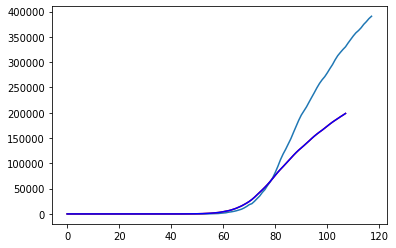

In [100]:
import matplotlib.pyplot as plt
plt.plot(cases_data_train + cases_data_train)
plt.plot(prediction,'r')
plt.plot(prediction2,'b')

In [101]:
cases_data = cases_data.reshape((-1))

def predict(num_prediction, model):
    prediction_list = cases_data[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list
    
def predict_dates(num_prediction):
    last_date = df['dateRep'].values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

num_prediction = 7
forecast = predict(num_prediction, model)
forecast_dates = predict_dates(num_prediction)

In [102]:
forecast

array([195351.      , 201787.078125, 206158.609375, 210130.453125,
       213897.03125 , 217610.671875, 221463.890625, 225477.953125])

In [108]:
xd = np.abs(forecast[2] - 202000)

In [111]:
xd/202000*100


2.0587175123762376